In [2]:
# Importing required libraries
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

The dataset covers information on different species of penguins, including the island the sample was taken from, as well as their bill length and depth.

The dataset focuses on predicting the species of a penguin based on its physical characteristics. There are three types of Penguins that the dataset has data on: the Adelie, Chinstrap, and Gentoo penguins, as shown below:

In [21]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('penguins.csv')

# Remove the first column (assuming it's unnamed)
df = df.loc[:, 'species':]

# Save the modified DataFrame to a new CSV file
df.to_csv('pg.csv', index=False)

In [22]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [24]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   gender             333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [26]:
# Dropping missing records
df = df.dropna()
print(len(df))

333


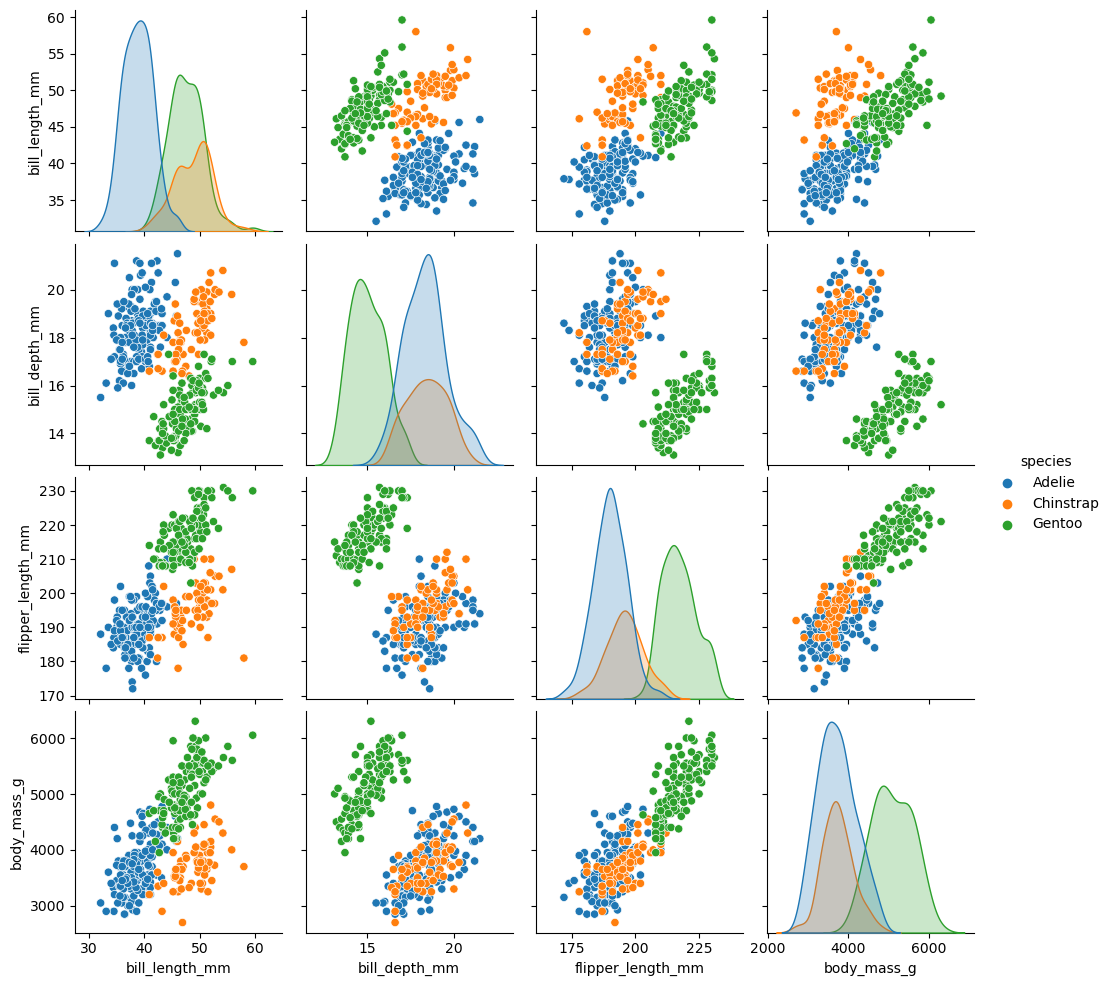

In [27]:
# Plotting our penguin species features
pairplot(df, hue='species')
plt.show()

. Each scatter plot represents the relationship between two variables, and each histogram displays the distribution of a single variable along the diagonal of the grid.

When facing multiple classes, Sklearn applies a one-to-one approach where it models the hyperplane for each pair of potential options. For example, it would build the classifer for Adelie vs. Chinstrap, ignoring Gentoo. Then it would do that same for Adelie vs. Gentoo, ignoring Chinstrap.

In one-to-one multi-class SVM, the class with the most predicted values is the one that’s predicted.


models = (num_classes * (num_classes - 1)) / 2

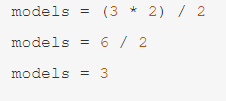

In [28]:
# Splitting our data
X = df[['bill_length_mm', 'bill_depth_mm']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

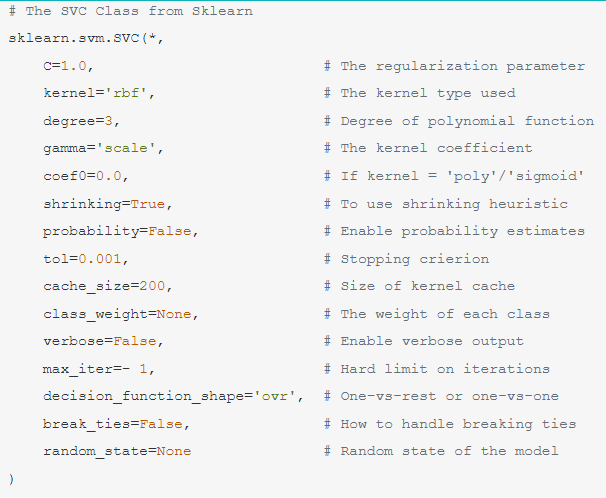

In [29]:
# Building and training our model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [30]:
X_test.head()

,bill_length_mm,bill_depth_mm
184,42.5,16.7
181,52.8,20.0
340,46.8,14.3
52,35.0,17.9
296,47.5,14.2


In [31]:
# Making predictions with our data
predictions = clf.predict(X_test)
print(predictions[:5])

['Chinstrap' 'Chinstrap' 'Gentoo' 'Adelie' 'Gentoo']


In order to make this simpler, let’s limit our algorithm to a binary classification.

In [32]:
# Rerunning the algorithm with a binary classifier
df = load_dataset('penguins')
df = df.dropna()
df = df[df['species'] != 'Gentoo']    # This limits us to two classes
value_counts = df['species'].value_counts(ascending=False)
print(value_counts)


Adelie       146
Chinstrap     68
Name: species, dtype: int64


In [33]:
# X = df.select_dtypes('number')
X = df[['bill_length_mm', 'bill_depth_mm']]
y = df['species']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

We’ll expand the scope to the original intent of the algorithm, to classify all three penguin specifies:



In [35]:
# Testing the accuracy of our model
df = pd.read_csv('pg.csv')
df = df.dropna()

X = df[['bill_length_mm', 'bill_depth_mm']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9761904761904762


#### Handling categorical data 

In [36]:
# One-hot encoding categorical variables in Sklearn
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [37]:
df = pd.read_csv('pg.csv')
df = df.dropna()

In [38]:
X = df.drop(columns = ['species'])
y = df['species']

In [39]:
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Biscoe,45.2,14.8,212.0,5200.0,Female


In [40]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

column_transformer = make_column_transformer(
    (OneHotEncoder(), ['gender', 'island']),
    remainder='passthrough')

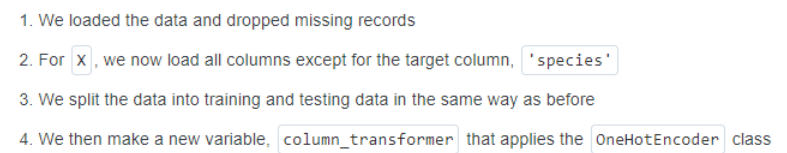

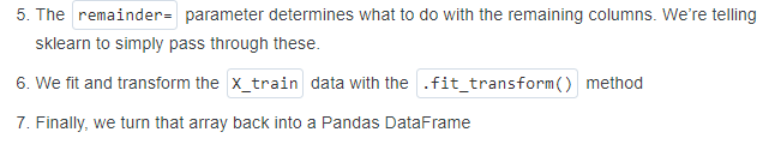

The make_column_transformer function is called to create a column transformer object. It takes two arguments:

The first argument is a tuple (transformer, columns), where transformer represents the transformer to be applied to the specified columns, and columns is a list of column names to which the transformer should be applied. In this case, OneHotEncoder() is chosen as the transformer, and it will be applied to the columns 'gender' and 'island'.

The second argument is remainder, which specifies how to handle the remaining columns that are not explicitly specified. In this code snippet, 'passthrough' is used, which means those columns will be left untouched and passed through without any transformation.

In [42]:
X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())

Applying Transformation: The fit_transform() method is called on the column_transformer object, passing in the X_train dataset. This method applies the specified transformations to the relevant columns of the dataset. In this case, it applies the OneHotEncoder transformation to the 'sex' and 'island' columns and leaves the remaining columns unchanged based on the remainder='passthrough' configuration.

Creating a DataFrame: After transforming the data, the resulting transformed data is assigned back to the X_train variable. To convert it to a pandas DataFrame, the pd.DataFrame() constructor is used. The transformed data is passed as the data argument, and the column_transformer.get_feature_names_out() method is used to retrieve the names of the transformed features as column names for the DataFrame.

Result: The transformed X_train dataset is now a pandas DataFrame, with the original columns replaced by the transformed columns based on the specified transformations. The DataFrame will have the appropriate column names assigned to reflect the applied transformations.

In [43]:
X_train

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__island_Biscoe,onehotencoder__island_Dream,onehotencoder__island_Torgersen,remainder__bill_length_mm,remainder__bill_depth_mm,remainder__flipper_length_mm,remainder__body_mass_g
0,1.0,0.0,1.0,0.0,0.0,35.7,16.9,185.0,3150.0
1,1.0,0.0,0.0,0.0,1.0,38.8,17.6,191.0,3275.0
2,0.0,1.0,0.0,0.0,1.0,39.7,18.4,190.0,3900.0
3,1.0,0.0,1.0,0.0,0.0,46.4,15.0,216.0,4700.0
4,0.0,1.0,0.0,1.0,0.0,51.5,18.7,187.0,3250.0
...,...,...,...,...,...,...,...,...,...
244,0.0,1.0,1.0,0.0,0.0,37.6,19.1,194.0,3750.0
245,0.0,1.0,0.0,1.0,0.0,41.3,20.3,194.0,3550.0
246,1.0,0.0,1.0,0.0,0.0,43.5,15.2,213.0,4650.0
247,1.0,0.0,1.0,0.0,0.0,43.5,14.2,220.0,4700.0


In [44]:
print(X_train.iloc[:5, :4])


   onehotencoder__gender_Female  onehotencoder__gender_Male  \
0                           1.0                         0.0   
1                           1.0                         0.0   
2                           0.0                         1.0   
3                           1.0                         0.0   
4                           0.0                         1.0   

   onehotencoder__island_Biscoe  onehotencoder__island_Dream  
0                           1.0                          0.0  
1                           0.0                          0.0  
2                           0.0                          0.0  
3                           1.0                          0.0  
4                           0.0                          1.0  


#### Standardizing Data for Support Vector Machines


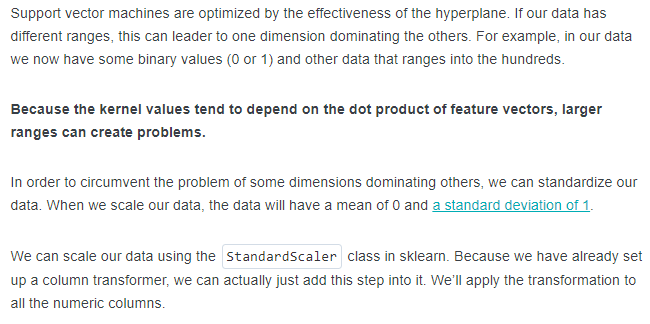

In [49]:
# Scaling our data in sklearn
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [45]:
df = pd.read_csv('pg.csv')
df = df.dropna()


In [46]:
X = df.drop(columns = ['species'])
y = df['species']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [50]:
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['gender', 'island']),
    (StandardScaler(), ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']),
    remainder='passthrough')

In [51]:
X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())

##### Hyper-Parameters of the SVM Algorithm in Scikit-Learn

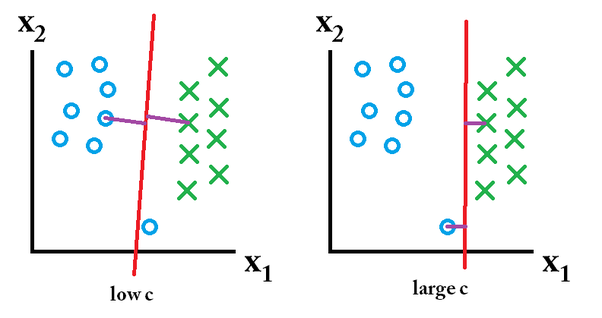

In [52]:
# Finding the best hyperparameters
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)
print(clf.best_params_)

# Returns: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


C (Regularization parameter):

The C parameter controls the trade-off between achieving a low training error and a low testing error.


A smaller value of C allows for a wider margin separating the classes but may result in more training errors.


A larger value of C puts more emphasis on classifying all training data points correctly and may lead to a narrower margin.


Choosing the appropriate value of C is crucial for preventing overfitting or underfitting the data. It can be determined through hyperparameter tuning.
gamma (Kernel coefficient):

The gamma parameter defines the influence of a single training example. It determines the reach of each training example in the decision boundary.


A smaller value of gamma indicates a larger influence, causing the decision boundary to be more localized or concentrated around individual data points.


A larger value of gamma results in a smaller influence, making the decision boundary smoother and more generalized across the training data.


The choice of gamma affects the flexibility and complexity of the SVM model. It can also influence the model's sensitivity to outliers.


Similar to C, the optimal value of gamma should be determined through hyperparameter tuning.
Both C and gamma are critical parameters in SVM that need to be carefully chosen to achieve good classification performance. The optimal values of these parameters depend on the specific dataset and problem at hand, and they often require experimentation and tuning to find the best combination for a given task.

kernel

 A kernel transformation looks at the similarly relationship (or kernel) between each pair of points and aims to find the best function transformation for that relationship.

For example, the kernel can take a number of different forms, depending on the relationship we want it to use. These can take different forms, including linear, nonlinear, polynomial, radial basis function, and sigmoid. Of these, the radial basis function is the most common. The rbf allows us to overcome space complexities since it only needs to store the support vectors during training (rather than the entire dataset).

Of course, calculating the actual values of each of these feature spaces would be computationally expensive. Because of this, data scientists and sklearn apply what’s referred to as the kernel trick, in which the data are not explicitly mapped. Instead, an implicit feature space is created without calculating the new coordinates.

Gamma

Finally, let’s take a look at the gamma hyperparameter. The gamma defines how far the influence of a single training example reaches. The lower the value, the further the reach of a training point. Inversely, the larger the value, the lower the reach of the training point.



Because of this inverse relationship, we can say that using a smaller gamma may mean that a model is more generalized. Inversely, the larger the value of gamma, the more likely the model may be overfitted to the training data.

In short: a small gamma will lower your bias but increase your variance, while a large gamma will increase your bias but lower your variance.

In [54]:
from seaborn import load_dataset
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the data and create training and testing data
df = pd.read_csv('pg.csv')
df = df.dropna()
X = df.drop(columns = ['species'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

# Create a transformer object
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['gender', 'island']),
    (StandardScaler(), ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']),
    remainder='passthrough')

# Transform the training features
X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())

# Building and fit the classifier
clf = SVC(kernel='rbf', gamma=0.01, C=1000)
clf.fit(X_train, y_train)

# Transform the training data
X_test = column_transformer.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=column_transformer.get_feature_names_out())

# Make predictions and check the accuracy
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))


0.9880952380952381


In [55]:
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)
print(clf.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [57]:
from seaborn import load_dataset
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the data and create training and testing data
df = pd.read_csv('pg.csv')
df = df.dropna()
X = df.drop(columns = ['species'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

# Create a transformer object
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['gender', 'island']),
    (StandardScaler(), ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']),
    remainder='passthrough')

# Transform the training features
X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())

# Building and fit the classifier
clf = SVC(kernel='linear', gamma=1, C=1)
clf.fit(X_train, y_train)

# Transform the training data
X_test = column_transformer.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=column_transformer.get_feature_names_out())

# Make predictions and check the accuracy
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))


1.0


In [58]:
from seaborn import load_dataset
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load the data and create training and testing data
df = pd.read_csv('pg.csv')
df = df.dropna()
X = df.drop(columns=['species'])
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

# Create a transformer object
column_transformer = make_column_transformer(
    (OneHotEncoder(), ['gender', 'island']),
    (StandardScaler(), ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']),
    remainder='passthrough')

# Transform the training features
X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())

# Transform the testing features
X_test = column_transformer.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=column_transformer.get_feature_names_out())

# Define the parameter grid for grid search
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Perform grid search with cross-validation
clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)

clf.fit(X_train, y_train)

# Print the best parameters found by grid search
print(clf.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [61]:
penguin = [{
    'gender': 'Female', 
    'island': 'Torgersen', 
    'bill_depth_mm': 23.3, 
    'bill_length_mm': 43.5, 
    'flipper_length_mm': 190, 
    'body_mass_g': 4123
}]

penguin = pd.DataFrame(penguin)
df_transformed = column_transformer.transform(penguin)
df_transformed = pd.DataFrame(df_transformed, columns=column_transformer.get_feature_names_out())
predicted_species = clf.predict(df_transformed)
print(predicted_species)

# Returns: ['Adelie']

['Adelie']


In [62]:
penguin2 = [{
    'gender': 'Female', 
    'island': 'Dream', 
    'bill_depth_mm': 17.8, 
    'bill_length_mm': 58, 
    'flipper_length_mm': 181, 
    'body_mass_g': 3700
}]

penguin2 = pd.DataFrame(penguin2)
df_transformed = column_transformer.transform(penguin2)
df_transformed = pd.DataFrame(df_transformed, columns=column_transformer.get_feature_names_out())
predicted_species = clf.predict(df_transformed)
print(predicted_species)

['Chinstrap']
